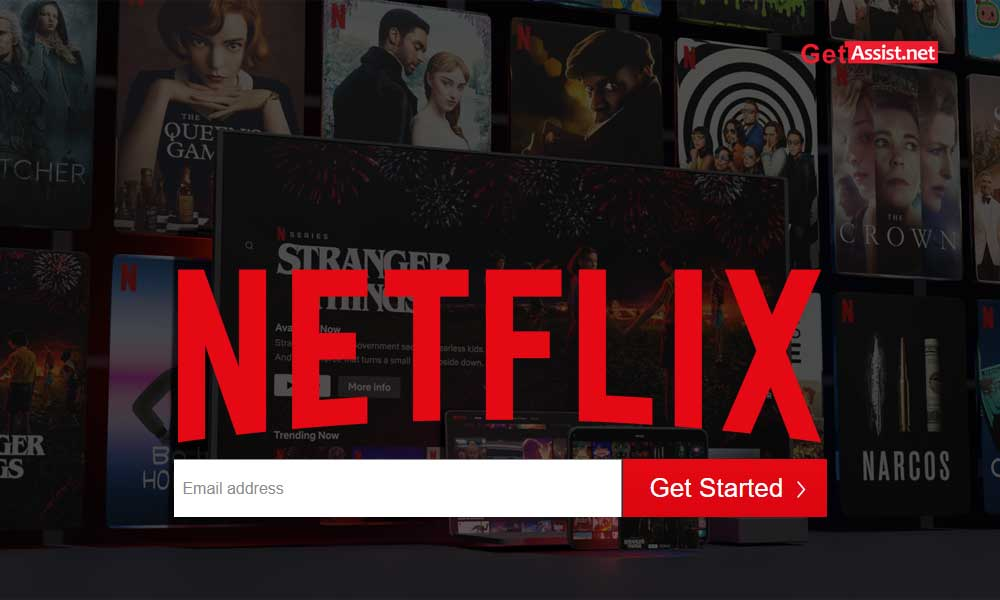

***Netflix Data: Cleaning, Analysis, and Visualization***

***1. Introduction***

**Project Overview**

This project involves analyzing a dataset of Netflix movies and TV shows to extract insights and potentially build a recommendation system. We can explore various aspects of the data to understand trends and patterns in content, viewership, and popularity.

This notebook demonstrates the process of Netflix Data Cleaning, Analysis and Visulization. We'll walk through the following steps:

**About Dataset**

Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned with PostgreSQL and visualized with Tableau. The purpose of this dataset is to test my data cleaning and visualization skills. The cleaned data can be found below and the Tableau dashboard can be found here.

**Motivation**

Accurate content recommendation models are invaluable in the streaming industry, aiding:

Understanding audience preferences and content trends to inform content

*   Understanding audience preferences and content trends to inform content creation and acquisition strategies.

*   Identifying opportunities to improve user engagement and retention through data-driven insights.

*   Enhancing the user experience by providing personalized content recommendations based on viewing habits and preferences.
*   Optimizing content distribution and marketing efforts through data analysis and visualization.


*   Gaining a competitive edge in the streaming industry by leveraging data insights to drive business decisions.


**Data Description**

Our dataset comprises the following key features:

    show_id    - Unique identifier for each show

    type - Type of content (Movie or TV Show)

    title - Title of the show

    director- Director of the show

    country - Country of origin

    date_added - Date the show was added to Netflix

    release_year - Year the show was released

    rating - Rating of the show

    duration - Duration of the show

    listed_in - Genres the show is listed under
This dataset provides a unique opportunity to delve into the factors that shape the popularity of Netflix content and develop a robust model for predicting audience preferences.

**2. Importing Libraries**

In [4]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud



# remove warnings

import warnings

warnings.filterwarnings('ignore')


*   Loading file in Google collab




In [5]:
import pandas as pd
import os
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file
try:
    file = pd.read_csv(filename)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {filename}. Please upload the file first.")

Saving netflix1.csv to netflix1.csv
File loaded successfully!


2. ***Load Dataset***

In [6]:
import pandas as pd
file=pd.read_csv('netflix1.csv')
file.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
new_var = file.columns
new_var

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
# Import necessary library
import pandas as pd

# Load the dataset
# Make sure 'netflix1.csv' is in the correct path
# or use the full file path
data = pd.read_csv('netflix1.csv')

# Checking the shape of the data
num_rows, num_cols = data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 8790
Number of Columns: 10



***3. Data Cleaning***

The datasets might require cleaning, such as handling missing values, converting data types and drop duplicates.

In [9]:
# Check for missing values

print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [10]:
# Checking duplicates if any

data.duplicated().any()

False

In [11]:
# Convert 'date_added' to datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [12]:
# Show data types to confirm changes

data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


***4. Exploratory Data Analysis (EDA)***

**4.1 Content Type Distribution (Movies vs. TV Shows)**

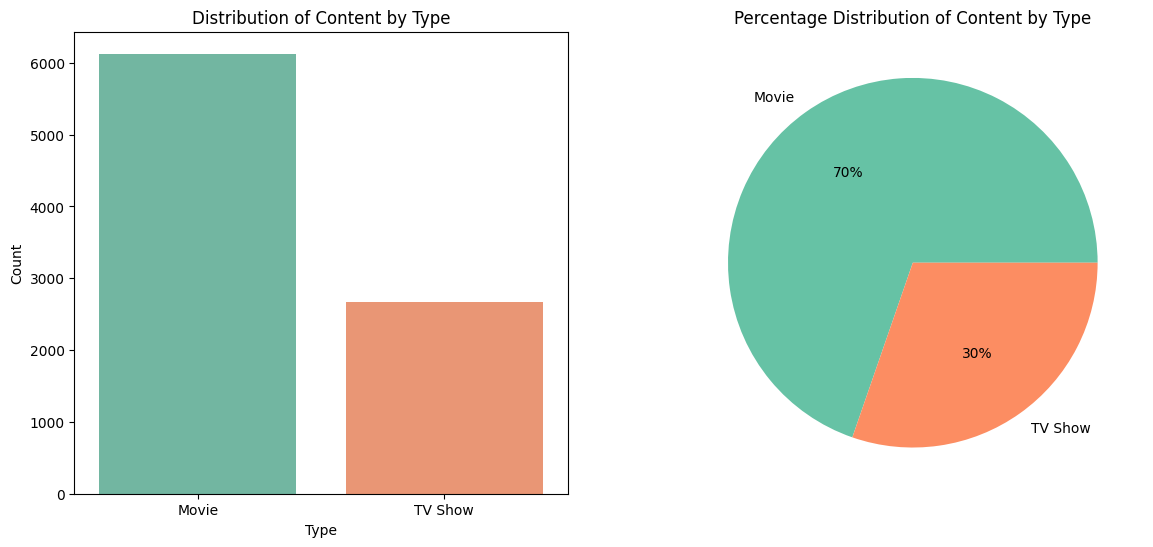

In [13]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()

# Plot the distribution

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')

plt.title('Distribution of Content by Type')

plt.xlabel('Type')

plt.ylabel('Count')



plt.subplot(1, 2, 2)

plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))

plt.title('Percentage Distribution of Content by Type')

plt.show()

**4.2 Rating Frequency (Movies vs. TV Shows)**

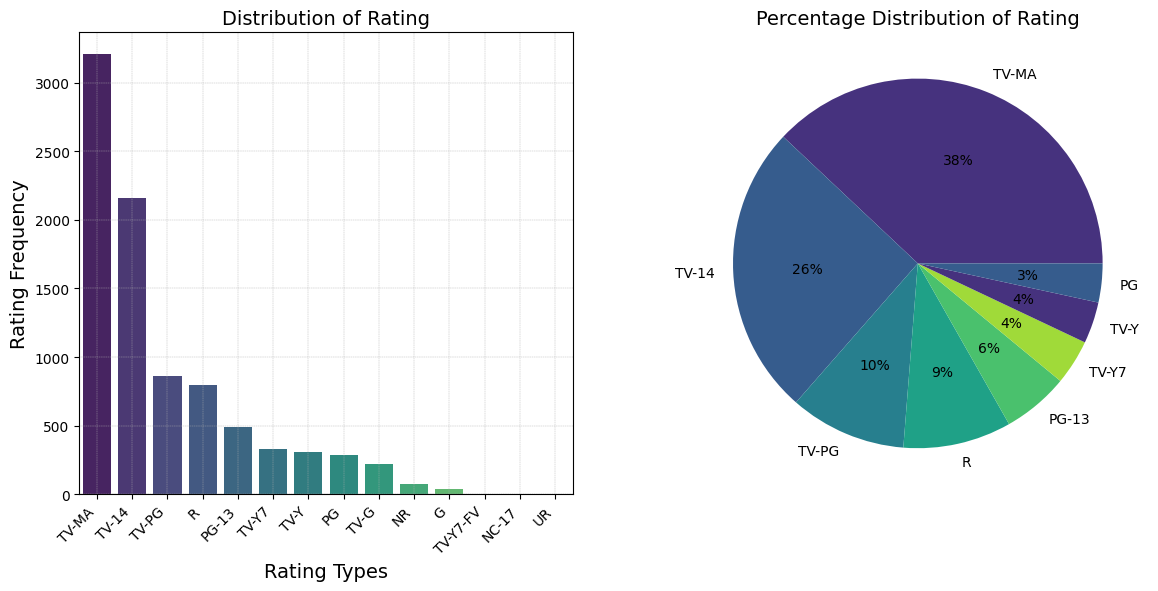

In [14]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x='rating', y='count', data=ratings, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Rating Types", fontsize=14)

plt.ylabel("Rating Frequency", fontsize=14)

plt.title('Distribution of Rating', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)



plt.subplot(1, 2, 2)

plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))

plt.title('Percentage Distribution of Rating', fontsize=14)

plt.show()

**4.3 Top 10 Countries with Most Content**

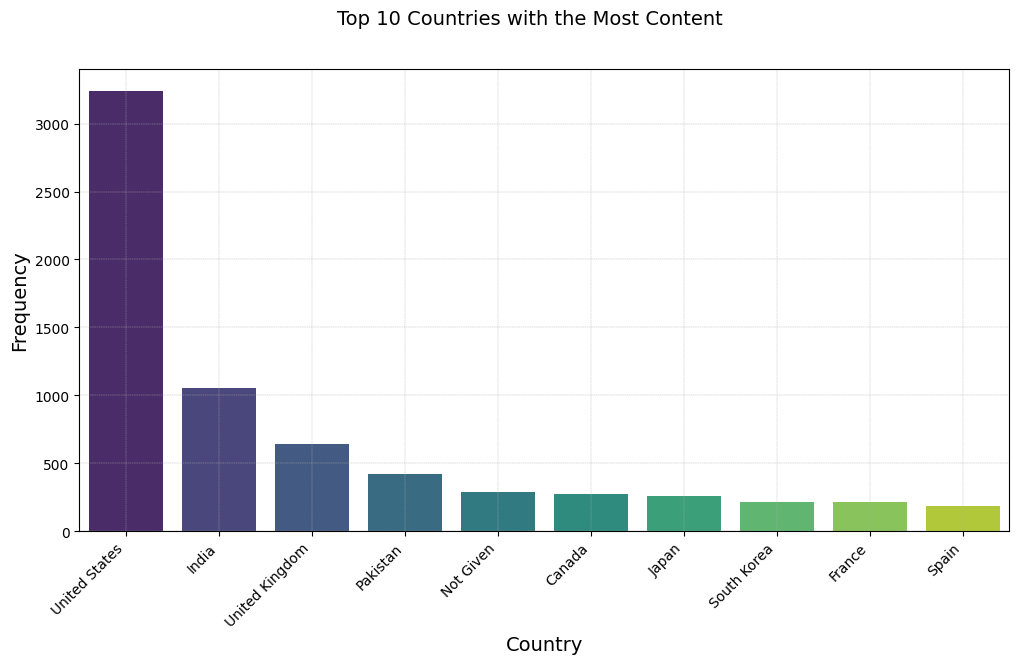

In [15]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(12, 6))

sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Country", fontsize=14)

plt.ylabel("Frequency", fontsize=14)

plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

**4.4 Top 15 Directors with the Most Titles**

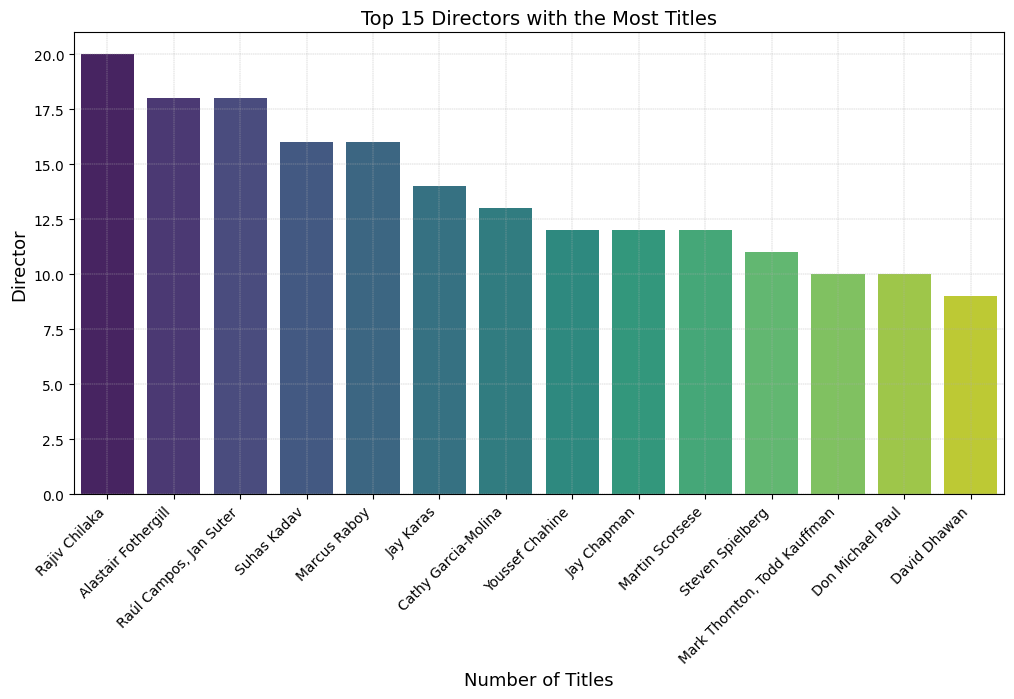

In [16]:
# Count titles by director

top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

# Plot top directors

plt.figure(figsize=(12, 6))

sns.barplot(y='count', x='director', data=top_directors, palette='viridis')

plt.title('Top 15 Directors with the Most Titles', fontsize=14)

plt.xlabel('Number of Titles', fontsize=13)

plt.ylabel('Director', fontsize=13)

plt.xticks(rotation=45, ha='right')

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

**4.5 Top 10 Popular Movie Genres**

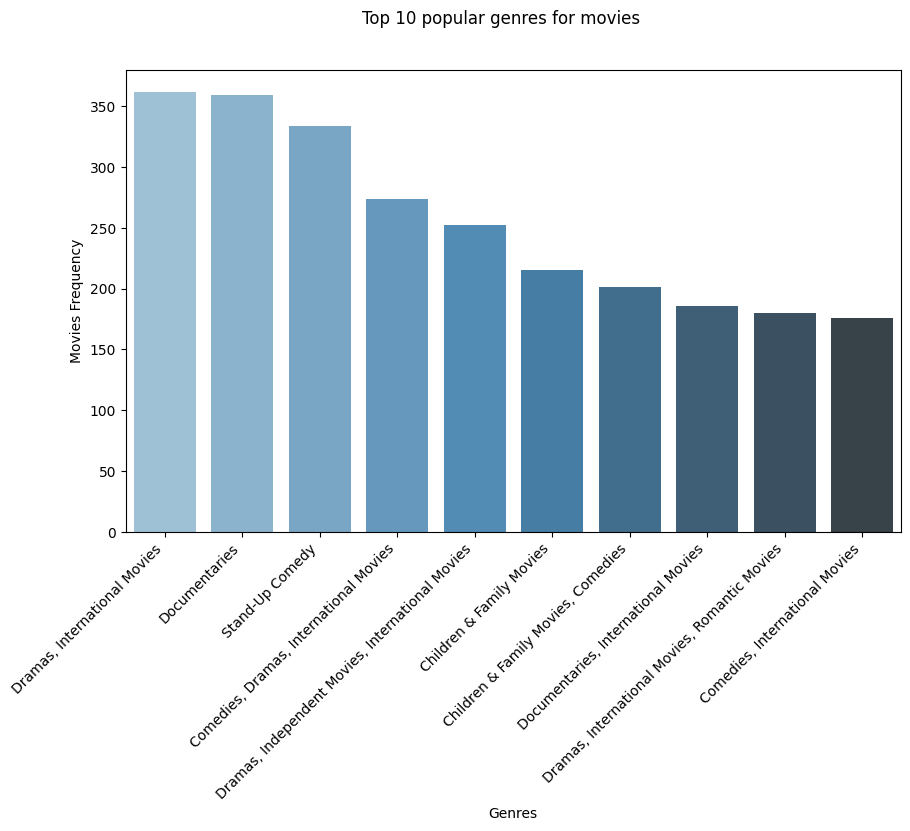

In [17]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]



plt.figure(figsize=(10, 6))

sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")

plt.ylabel("Movies Frequency")

plt.suptitle("Top 10 popular genres for movies")

plt.show()

In [18]:
# Extract year and month from 'date_added'

data['year_added'] = data['date_added'].dt.year

data['month_added'] = data['date_added'].dt.month

**4.7 Monthly Releases of Movies and TV shows**

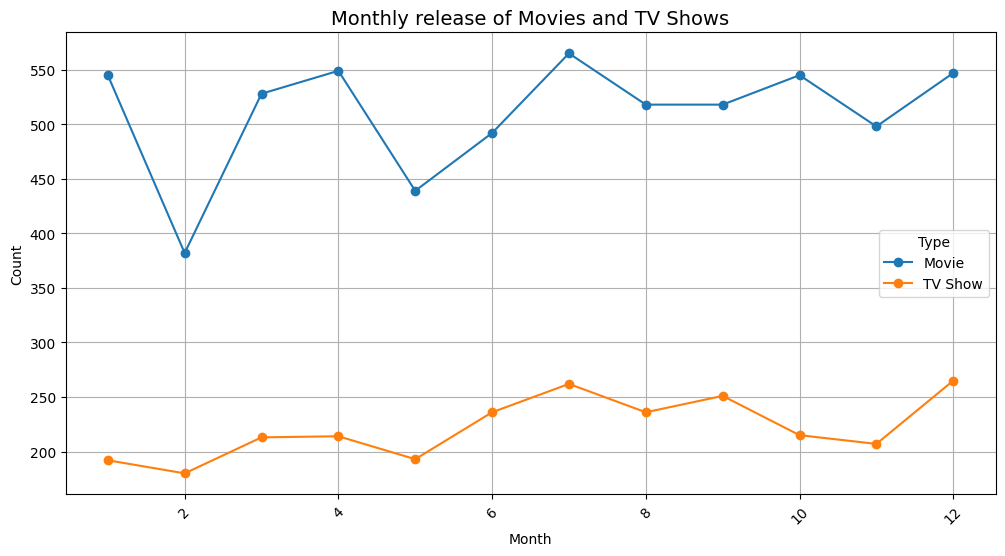

In [19]:
# Plot content added over the months using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Monthly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

**4.8 Yearly Releases of Movies and TV shows**

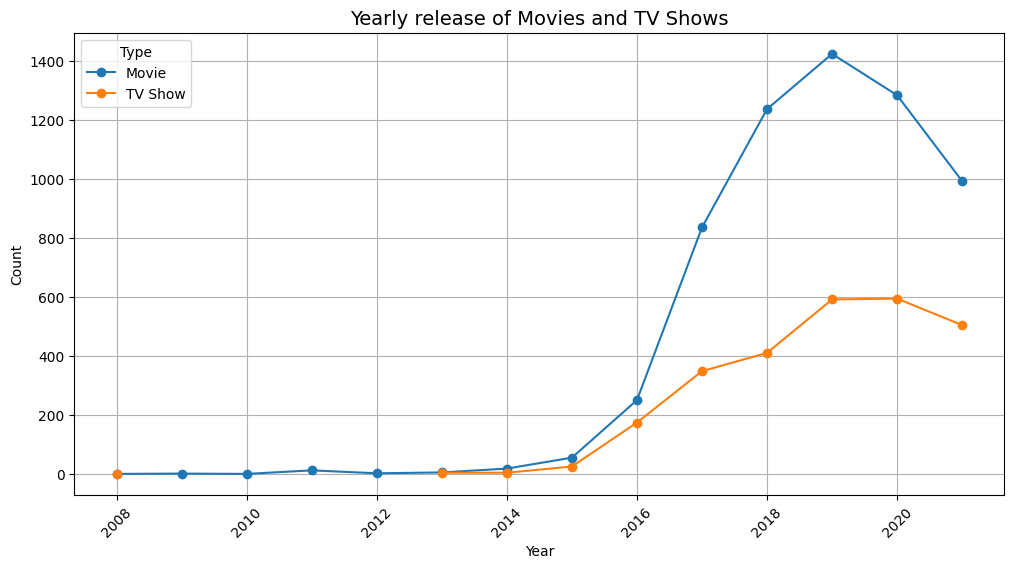

In [20]:
# Plot content added over the years using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Yearly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Year')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()


**4.9 Word Cloud of Movie Titles**

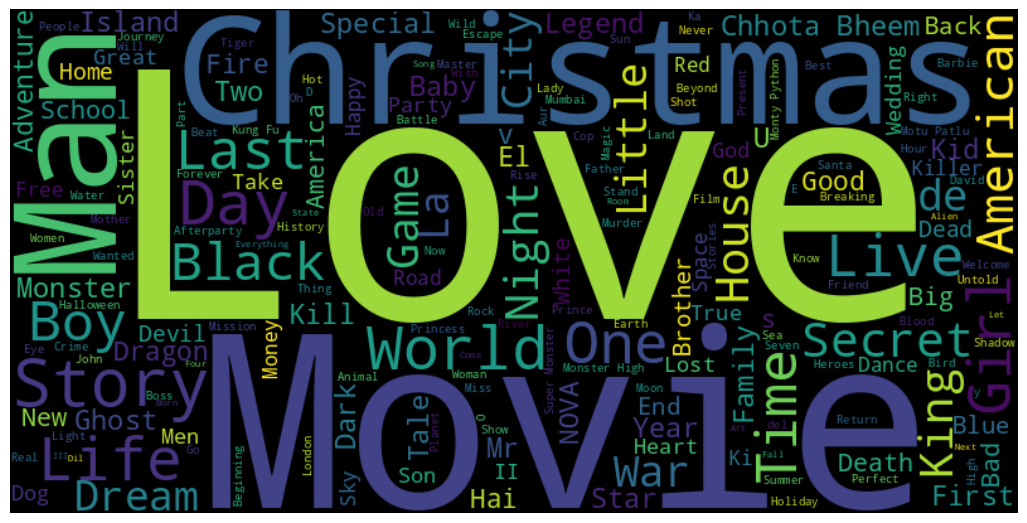

In [21]:
# Create a word cloud for movie titles

movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))



# Display the word cloud

plt.figure(figsize=(13, 7))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

***5. Conclusion and Insights***

***Conclusion:***

Netflix offers a vast and diverse library of movies and TV shows spanning various genres, release years, and countries. The platform caters to a broad audience, with content featuring a wide range of actors, directors, and production styles. The data indicates a dynamic and evolving landscape of content on Netflix, with patterns in user preferences, content popularity, and collaboration networks. By leveraging data analytics, Netflix can optimize content recommendations, understand audience behavior, and stay competitive in the rapidly evolving entertainment industry.

***Insights:***

Here are some specific insights that might be extracted:

Content Trends:

Analyze the distribution of movies and TV shows across genres and release years. Identify popular and emerging genres over time. This can help understand content trends and preferences among viewers. For example, you could identify an increasing number of documentaries released, or a decline in romantic comedies.

User Behavior:

If the dataset includes user behavior data, examine viewing patterns, preferred genres, and ratings to understand user preferences. This information can drive personalized recommendations and improve user engagement with the platform. You could see that users who watch horror movies are more likely to watch thriller movies as well.

Collaboration Networks:

Identify actor/actor and actor/director pairs that frequently work together. Discover the most influential and sought-after talent within the Netflix network. This can help with casting decisions and understanding creative partnerships. An example would be identifying a frequently occurring actor/director pair that produces highly rated content.

Popularity:

Rank actors, directors, and shows based on popularity metrics like ratings, views, or awards. Understand the factors that contribute to content popularity and identify opportunities for new productions. For instance, you might find that movies with a specific actor tend to receive higher ratings and more views.

Regional Preferences:

Explore content preferences and popular genres across different regions. Adapt content strategies and recommendations to cater to local tastes and preferences. You could discover that a particular genre is more popular in one country compared to others.

**15 QUESTIONS ON THE DATASET** :

***Data Cleaning***


1 . How many null values were there in the original dataset, and which columns had the highest proportion of missing data?

2 . What inconsistencies were found in data types during the cleaning process, and how were they resolved?

3 . Were there any duplicate rows in the dataset? How were they handled?

4 . How was the date_added column transformed, and what insights were gained from converting it to a datetime object?

***Exploratory Data Analysis (EDA)***

5 . What is the proportion of Movies vs. TV Shows on Netflix? How has this trend evolved over the years?

6 . Which are the most common ratings for Netflix content, and how do they vary between Movies and TV Shows?

7 . What are the top 10 countries producing the most content on Netflix, and how does their output differ between Movies and TV Shows?

8 . Who are the top 15 directors on Netflix in terms of the number of titles?  

9 . Do they specialize in particular genres?

10 . Which genres are most popular among Netflix Movies, and how does this
     differ from the most popular genres for TV Shows?

11 . What is the distribution of content additions over the months of a year?

12 . Are certain months more active for new releases?

13 . What is the trend of yearly releases on Netflix? Did any specific year see a sharp increase in content?

14 . What patterns emerge from analyzing the durations of Movies and the seasons of TV Shows?

15 . What does the word cloud of Movie titles reveal about common themes or words in Netflix content?



